### The Regression Problem - PCA and training a Regressor

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('train_data_cleaned.csv')

In [0]:
from sklearn.decomposition import PCA

In [4]:
df

,Unnamed: 0,radius_0,texture_0,perimeter_0,radius_1,texture_1,perimeter_1,radius_2,texture_2,perimeter_2,age,cancer_type,diff_diagnose_traitement
0,0,19.858394,27.204437,136.324256,22.683290,32.802578,119.523841,21.477052,27.307087,82.366936,44,0,19267200.0
1,1,14.182069,15.754730,80.916983,14.043753,30.094704,94.911073,15.012329,17.855131,103.078286,59,1,110160000.0
2,4,14.875600,17.534187,98.545830,14.380683,26.190447,89.712492,12.930685,19.856687,108.380754,21,1,49420800.0
3,7,14.292161,28.430808,81.293588,15.042501,36.480522,78.668608,14.584187,24.055640,126.014415,40,1,62467200.0
4,8,13.119916,14.619103,88.293516,13.093215,12.299673,81.907981,13.963749,16.908342,56.235029,43,1,21081600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,390,14.848246,20.464676,117.535591,15.405057,22.227830,106.933004,16.341575,19.945252,176.030398,36,0,62035200.0
195,391,21.081445,20.429425,114.246985,17.505730,49.229470,161.196507,18.300994,22.080930,120.032441,27,0,42595200.0
196,392,21.452732,24.270587,165.240157,18.315527,27.464137,112.425470,18.751829,17.959451,69.344406,18,0,39571200.0
197,395,11.901766,14.899430,75.271179,11.915226,27.449196,83.673309,11.747213,22.852121,134.297230,34,1,36806400.0


In [6]:
df.pop('Unnamed: 0')

0        0
1        1
2        4
3        7
4        8
      ... 
194    390
195    391
196    392
197    395
198    396
Name: Unnamed: 0, Length: 199, dtype: int64

In [7]:
df

,radius_0,texture_0,perimeter_0,radius_1,texture_1,perimeter_1,radius_2,texture_2,perimeter_2,age,cancer_type,diff_diagnose_traitement
0,19.858394,27.204437,136.324256,22.683290,32.802578,119.523841,21.477052,27.307087,82.366936,44,0,19267200.0
1,14.182069,15.754730,80.916983,14.043753,30.094704,94.911073,15.012329,17.855131,103.078286,59,1,110160000.0
2,14.875600,17.534187,98.545830,14.380683,26.190447,89.712492,12.930685,19.856687,108.380754,21,1,49420800.0
3,14.292161,28.430808,81.293588,15.042501,36.480522,78.668608,14.584187,24.055640,126.014415,40,1,62467200.0
4,13.119916,14.619103,88.293516,13.093215,12.299673,81.907981,13.963749,16.908342,56.235029,43,1,21081600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
194,14.848246,20.464676,117.535591,15.405057,22.227830,106.933004,16.341575,19.945252,176.030398,36,0,62035200.0
195,21.081445,20.429425,114.246985,17.505730,49.229470,161.196507,18.300994,22.080930,120.032441,27,0,42595200.0
196,21.452732,24.270587,165.240157,18.315527,27.464137,112.425470,18.751829,17.959451,69.344406,18,0,39571200.0
197,11.901766,14.899430,75.271179,11.915226,27.449196,83.673309,11.747213,22.852121,134.297230,34,1,36806400.0


In [0]:
Y = df.pop('cancer_type')

In [23]:
df.corr()

,radius_0,texture_0,perimeter_0,radius_1,texture_1,perimeter_1,radius_2,texture_2,perimeter_2,age,diff_diagnose_traitement
radius_0,1.000000,0.005180,0.113626,0.115054,0.075092,0.159065,0.176054,0.064614,-0.128659,-0.044083,-0.047974
texture_0,0.005180,1.000000,0.172410,0.160895,0.048974,0.157387,0.077206,0.535808,0.023621,0.006985,-0.067880
perimeter_0,0.113626,0.172410,1.000000,0.800726,0.173756,0.808725,0.800986,0.227519,-0.034451,-0.025681,-0.074262
radius_1,0.115054,0.160895,0.800726,1.000000,0.181463,0.806034,0.843829,0.181725,0.028822,-0.057534,-0.045702
texture_1,0.075092,0.048974,0.173756,0.181463,1.000000,0.166426,0.097320,0.094882,0.034127,0.040817,-0.057287
perimeter_1,0.159065,0.157387,0.808725,0.806034,0.166426,1.000000,0.850733,0.170825,-0.000843,-0.086787,-0.081380
radius_2,0.176054,0.077206,0.800986,0.843829,0.097320,0.850733,1.000000,0.105429,-0.034821,-0.116326,-0.043123
texture_2,0.064614,0.535808,0.227519,0.181725,0.094882,0.170825,0.105429,1.000000,0.022665,0.036192,-0.031336
perimeter_2,-0.128659,0.023621,-0.034451,0.028822,0.034127,-0.000843,-0.034821,0.022665,1.000000,0.027561,0.015842
age,-0.044083,0.006985,-0.025681,-0.057534,0.040817,-0.086787,-0.116326,0.036192,0.027561,1.000000,0.125651


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df)
X = scaler.transform(df)

pca1d = PCA().fit(X)

In [21]:
pca1d.components_

array([[ 0.11251542,  0.13928813,  0.47674239,  0.4798955 ,  0.12422743,
         0.48332616,  0.47927296,  0.15976389, -0.00959814, -0.052278  ,
        -0.05716021],
       [-0.05846884,  0.67353784, -0.04750306, -0.08267158,  0.0987224 ,
        -0.09896966, -0.18840532,  0.66574118,  0.10813365,  0.14428442,
        -0.05547224],
       [ 0.46803748,  0.08806511, -0.07684301, -0.11310695, -0.0427477 ,
        -0.04434131, -0.03677228,  0.06658321, -0.48991701, -0.49628548,
        -0.50851787],
       [ 0.4675766 , -0.03831565,  0.01389729, -0.03101997,  0.11491805,
        -0.02734486, -0.00764903,  0.06919944, -0.54142542,  0.50933025,
         0.45539972],
       [-0.19064402,  0.16219729,  0.03518824,  0.02567747, -0.83449322,
         0.03104114,  0.10468882,  0.09458715, -0.24374186, -0.20050966,
         0.34436342],
       [ 0.54989699,  0.00150535, -0.10870789, -0.02310398,  0.04215327,
        -0.01931684,  0.00283868,  0.0836894 ,  0.49318702, -0.43895117,
         0.490

In [22]:
pca1d.singular_values_

array([26.92235526, 17.10689459, 15.20315542, 14.56065876, 14.16998381,
       13.08714903, 12.75106838,  9.55892808,  6.33273928,  6.12045622,
        4.98035072])

In [0]:
from matplotlib import pyplot as plt

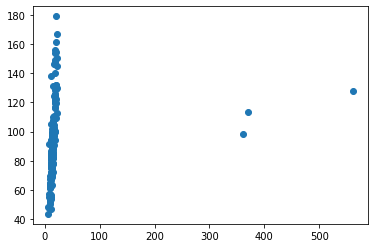

In [32]:
plt.scatter(df['radius_0'].to_numpy(),df['perimeter_1'].to_numpy())

In [0]:
from sklearn.linear_model import ElasticNet

In [0]:
reg = ElasticNet(alpha=0.5,l1_ratio=0.5)

In [36]:
reg.fit(X.to_numpy(),df['perimeter_1'].to_numpy())

ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
X = pd.DataFrame({ 'r1': df['radius_1'].to_numpy(),
                  'r2': df['radius_0'].to_numpy()})

In [37]:
reg.predict([[14.380683,14.875600]])

array([93.74569073])

In [39]:
df['perimeter_1'][2]

89.71249158459999

In [0]:
from sklearn.model_selection import cross_val_score, ShuffleSplit, train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer

In [0]:
cv = ShuffleSplit(n_splits=10,test_size=0.5)

In [0]:
notre_scorer = make_scorer(r2_score)
scores = cross_val_score(reg,X,df['perimeter_1'].to_numpy(),cv=cv,scoring=notre_scorer)

In [49]:
scores.mean()

0.6043962605218273

In [50]:
scores

array([0.63831966, 0.62415056, 0.55429419, 0.48946074, 0.67662274,
       0.6197738 , 0.61391707, 0.56149422, 0.65011549, 0.61581413])

In [53]:
alpha = [0.01, 0.1, 0.2, 0.5, 1]
r1_ratio = [0.25, 0.5, 0.75]

nos_scores = []
for a in alpha:
  for r in r1_ratio:
    reg = ElasticNet(alpha=a,l1_ratio=r)
    scores = cross_val_score(reg,X,df['perimeter_1'].to_numpy(),cv=cv,scoring=notre_scorer)
    print("alpha = "+str(a)+", r1_ratio = "+str(r)+" : "+str(scores.mean()))
    nos_scores.append(scores.mean())

alpha = 0.01, r1_ratio = 0.25 : 0.6082370066255658
alpha = 0.01, r1_ratio = 0.5 : -31.332477358737332
alpha = 0.01, r1_ratio = 0.75 : -16.675201219526336
alpha = 0.1, r1_ratio = 0.25 : -128.22986491109714
alpha = 0.1, r1_ratio = 0.5 : -11.191794382946396
alpha = 0.1, r1_ratio = 0.75 : 0.6495606313860771
alpha = 0.2, r1_ratio = 0.25 : -30.890639914008307
alpha = 0.2, r1_ratio = 0.5 : -30.0619381855023
alpha = 0.2, r1_ratio = 0.75 : -20.009358318160796
alpha = 0.5, r1_ratio = 0.25 : -19.854699100792168
alpha = 0.5, r1_ratio = 0.5 : 0.6308249300978974
alpha = 0.5, r1_ratio = 0.75 : -50.65890454398768
alpha = 1, r1_ratio = 0.25 : -14.638018856186786
alpha = 1, r1_ratio = 0.5 : 0.6406558363703073
alpha = 1, r1_ratio = 0.75 : -7.107290195438546


In [55]:
import numpy as np
np.array(nos_scores).max()

0.6495606313860771

In [0]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
scores = cross_val_score(reg,X,df['perimeter_1'].to_numpy(),cv=cv,scoring=notre_scorer)

In [58]:
scores.sum()

-203.0251408384718

In [0]:
from sklearn.feature_extraction import CountVectorizer
v = CountVectorizer()
CountVectorizer.fit(X)
x_count = CountVectorizer.tranform(X)
np.array(x_count).sum()
count_nouveau = CountVectorizer.transform([test])


In [0]:
X_final, X_p, Y_final, Y_p = train_test_split(X,df['perimeter_1'].to_numpy(),test_size=0.5)

In [70]:
reg = ElasticNet(alpha=0.1,l1_ratio=0.75)
reg.fit(X_final,Y_final)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.75,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
import pickle
f = open('mon_predicteur.pickle','wb')
pickle.dump(reg,f)
f.close()

In [0]:
import pickle

In [0]:
pickle.dump()